In [1]:
import matplotlib.pyplot as plt
from unidecode import unidecode
import pandas as pd
import re
import random
from scipy import stats
from wordcloud import WordCloud

In [2]:
ingles = [
    'lgbt',
    'woke', 'wokeness', 'wookies',
    'male-hating',
    'political ideology', 'agenda',
    'liberal',
    'leftism', 'left wing', 'faggot', 'fag', 'faggy',
    'lesbian',
    'feminist', 'sjw', 'tranny',
    'politically correct'
]

portugues = [
    'lacrar', 'lacracao', 'lacrador', 'lacradores', 'lacra',
    'misandria', 'misandrico', 'ideologia', 'agenda',
    'liberal',
    'esquerdista', 'esquerdalha', 'viado', 'bicha', 'viadinho',
    'lesbica',
    'feminista',
    'traveco', 'travesti',
    'politicamente correto'
]

espanhol = [

    'misandria',
    'ideología', 'politica', 'agenda',
    'liberal',
    'izquierda', 'izquierdista',
    'marica', 'maricón',
    'lesbiana',
    'feminista', 'justicia social', 'transexual',
    'corrección política'
]

russo = [
    'Проснулся', 'проснулась', 'Проснувшийся', 'проснувшаяся',
    'Мужененависничество',
    'Политическая идеология', 'Повестка дня', 'повестками',
    'Либерал', 'Либеральный-ая', 'левизм', 'левое крыло',
    'Пидорас', 'Педик', 'Пидор', 'гомопидорские', 'пидорасы', 'Пидорасня', 'гамасеков', 'хуесосы',
    'Лесбиянка', 'лесбы',
    'Феминистка',
    'трансгендеров', 'Трансвеститам', 'трансвеститы',
    'политически корректныи'
]

todasPalavras = ingles + portugues + espanhol + russo
todasPalavras = list(set(todasPalavras))

In [3]:
print(todasPalavras)

['male-hating', 'misandria', 'feminista', 'faggot', 'bicha', 'tranny', 'lacracao', 'lacradores', 'Пидор', 'Либеральный-ая', 'Повестка дня', 'maricón', 'Пидорасня', 'Политическая идеология', 'гамасеков', 'izquierda', 'wookies', 'проснувшаяся', 'трансвеститы', 'feminist', 'повестками', 'politica', 'ideologia', 'marica', 'corrección política', 'lesbian', 'political ideology', 'Пидорас', 'Трансвеститам', 'travesti', 'гомопидорские', 'misandrico', 'fag', 'Лесбиянка', 'хуесосы', 'Феминистка', 'левизм', 'пидорасы', 'faggy', 'liberal', 'wokeness', 'agenda', 'viado', 'esquerdalha', 'lesbica', 'traveco', 'politicamente correto', 'Мужененависничество', 'трансгендеров', 'transexual', 'lacra', 'woke', 'sjw', 'viadinho', 'ideología', 'izquierdista', 'Проснулся', 'left wing', 'Проснувшийся', 'левое крыло', 'проснулась', 'лесбы', 'politically correct', 'Педик', 'justicia social', 'lgbt', 'lesbiana', 'leftism', 'lacrar', 'политически корректныи', 'esquerdista', 'lacrador', 'Либерал']


In [4]:
df = pd.read_csv('data-sets/game_reviews_users_Toxicity.csv')
df = df.dropna()

def remover_acentos(texto):
    texto = unidecode(texto)
    texto = texto.lower()
    return texto

# Converter a coluna review para letra minúscula e remover acentos
df['review'] = df['review'].apply(remover_acentos)
todasPalavras = [remover_acentos(palavra) for palavra in todasPalavras]

C:\Users\cotoq\AppData\Local\Temp\ipykernel_16948\3846761359.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data-sets/game_reviews_users_Toxicity.csv')


In [5]:
contagem_palavras = {}
for palavra in todasPalavras:
    contagem = df['review'].str.count(r'\b' + palavra + r'\b').sum()
    contagem_palavras[palavra] = contagem

# Create a DataFrame with word counts
df_contagem = pd.DataFrame.from_dict(contagem_palavras, orient='index', columns=['contagem'])

# Sort the DataFrame by count in descending order
df_contagem_ordenado = df_contagem.sort_values(by='contagem', ascending=False)

# Save the result to a text file with utf-8 encoding
with open('contagem_palavras.txt', 'w', encoding='utf-8') as f:
    f.write("# Contar as ocorrências exatas de cada palavra-chave na coluna review\n")
    f.write(df_contagem_ordenado.to_string())

# Print the result
print(df_contagem_ordenado)

              contagem
woke              1005
agenda             912
sjw                776
lgbt               473
lesbian            229
...                ...
traveco              0
esquerdalha          0
misandrico           0
misandria            0
izquierdista         0

[71 rows x 1 columns]


In [6]:
for palavra in todasPalavras:
    df[palavra] = df['review'].str.count(r'\b' + palavra + r'\b')

# Group by title and sum the counts of keywords
df_contagem_titulo = df.groupby('title')[todasPalavras].sum()

# Calculate the total count of keywords for each title
df_contagem_titulo['total_palavras_chave'] = df_contagem_titulo.sum(axis=1)

# Sort the DataFrame by the total count of keywords in descending order
df_contagem_titulo_ordenado = df_contagem_titulo.sort_values(by='total_palavras_chave', ascending=False)

# Save the result to a text file
with open('contagem_palavras_por_titulo.txt', 'w', encoding='utf-8') as f:
    f.write("# Quantidade total de palavras-chave para cada título\n")
    f.write(df_contagem_titulo_ordenado.to_string())

# Print the result
print(df_contagem_titulo_ordenado)

                                        male-hating  misandria  feminista  \
title                                                                       
The Last of Us Part II                            1          0          3   
Mortal Kombat 11                                  0          0          0   
Ghost of Tsushima                                 0          0          0   
Horizon Forbidden West: Burning Shores            0          0          0   
Battlefield V                                     0          0          0   
...                                             ...        ...        ...   
Ghost Rider                                       0          0          0   
Ghost Rider (2007)                                0          0          0   
Ghost Song                                        0          0          0   
Ghost Squad                                       0          0          0   
while True: learn                                 0          0          0   

In [7]:
def find_random_texts_with_word_regex(df, word, num_texts=3):
    # Initialize an empty list to store matching texts
    matching_texts = []

    # Create regex pattern with word boundaries
    pattern = r'\b' + re.escape(word) + r'\b'

    # Iterate through the DataFrame and check each review
    for review in df['review']:
        # Check if pattern exists in review
        if re.search(pattern, review, flags=re.IGNORECASE):
            matching_texts.append(review)

    # Shuffle the list of matching texts
    random.shuffle(matching_texts)

    # Return up to num_texts number of random texts
    return matching_texts[:num_texts]
def save_texts_to_file(texts, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        for text in texts:
            file.write(text + '\n')

In [8]:
dfF = df[df['title']== 'The Last of Us Part II']
random_word = "lgbt"  # Replace with the word you're searching for
random_texts = find_random_texts_with_word_regex(dfF, random_word)

# Save random texts to a file
filename = 'random_texts.txt'  # Replace with your desired file name
save_texts_to_file(random_texts, filename)

print(f"Random texts containing '{random_word}' saved to '{filename}'")

Random texts containing 'lgbt' saved to 'random_texts.txt'


In [9]:
def filter_reviews_by_keywords(df, keywords):
    # Create regex pattern with all keywords joined by '|'
    pattern = '|'.join(r'\b{}\b'.format(re.escape(keyword)) for keyword in keywords)

    # Filter DataFrame to include only reviews that match the pattern
    filtered_df = df[df['review'].str.contains(pattern, flags=re.IGNORECASE, na=False)]

    return filtered_df

filtered_df = filter_reviews_by_keywords(df, todasPalavras)

In [10]:
filtered_df = filtered_df[filtered_df['Toxicity'] > 0]


In [11]:
df_main = df[~df['title'].isin(filtered_df['title'])]
df_main = df_main[df_main['Toxicity'] > 0]

print(filtered_df['Toxicity'].mean(), filtered_df['Toxicity'].std())
print(df_main['Toxicity'].mean(), df_main['Toxicity'].std())

0.29284741499905964 0.2038523158006544
0.12961740016426945 0.14524785145289207


In [12]:
import numpy as np

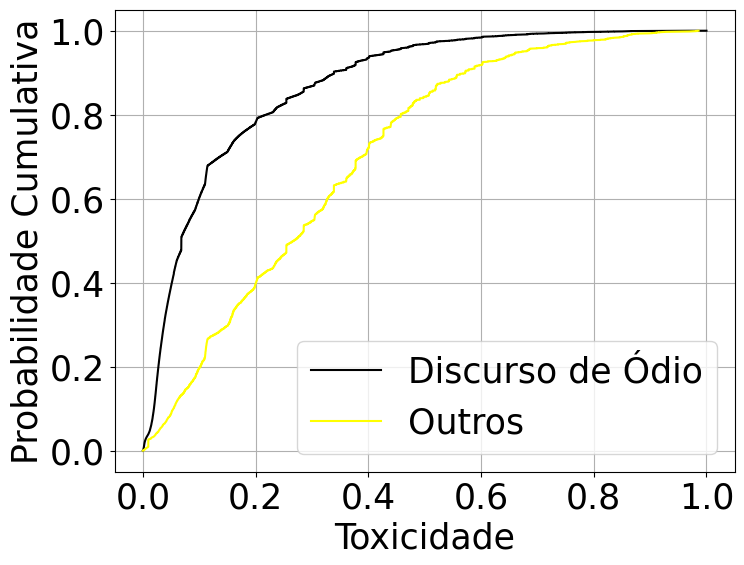

In [23]:
sorted_main = np.sort(df_main['Toxicity'])
cdf_main = np.arange(1, len(sorted_main) + 1) / len(sorted_main)

sorted_filtered = np.sort(filtered_df['Toxicity'])
cdf_filtered = np.arange(1, len(sorted_filtered) + 1) / len(sorted_filtered)

plt.figure(figsize=(8, 6))
plt.plot(sorted_main, cdf_main, label='Outros', linestyle='-', color='black')
plt.plot(sorted_filtered, cdf_filtered, label='Discurso de Ódio', linestyle='-', color='yellow')

# Alterar fonte para 25
plt.xlabel('Toxicidade', fontsize=25)
plt.ylabel('Probabilidade Cumulativa', fontsize=25)
plt.legend(fontsize=25)
plt.grid(True)
plt.savefig(r'C:\Users\cotoq\OneDrive\Área de Trabalho\gráficos\DiscursoOdio.pdf', bbox_inches='tight')
# Aumentar fonte dos ticks
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

In [14]:
print("Teste de Shapiro-Wilk para normalidade:")
print("Dataset 1:", stats.shapiro(df_main['Toxicity']))
print("Dataset 2:", stats.shapiro(filtered_df['Toxicity']))

# Teste t de Student para comparar médias
t_statistic, p_value = stats.ttest_ind(df_main['Toxicity'], filtered_df['Toxicity'])

print("\nResultado do teste t de Student:")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

if p_value < 0.05:
    print("\nAs médias são significativamente diferentes.")
else:
    print("\nNão há evidências suficientes para concluir que as médias são diferentes.")

Teste de Shapiro-Wilk para normalidade:
Dataset 1: ShapiroResult(statistic=0.7648863196372986, pvalue=0.0)
Dataset 2: ShapiroResult(statistic=0.9467952251434326, pvalue=3.311847702240298e-33)

Resultado do teste t de Student:
Estatística t: -64.38069143668389
Valor p: 0.0

As médias são significativamente diferentes.


C:\Users\cotoq\PycharmProjects\AllOfCritic\venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


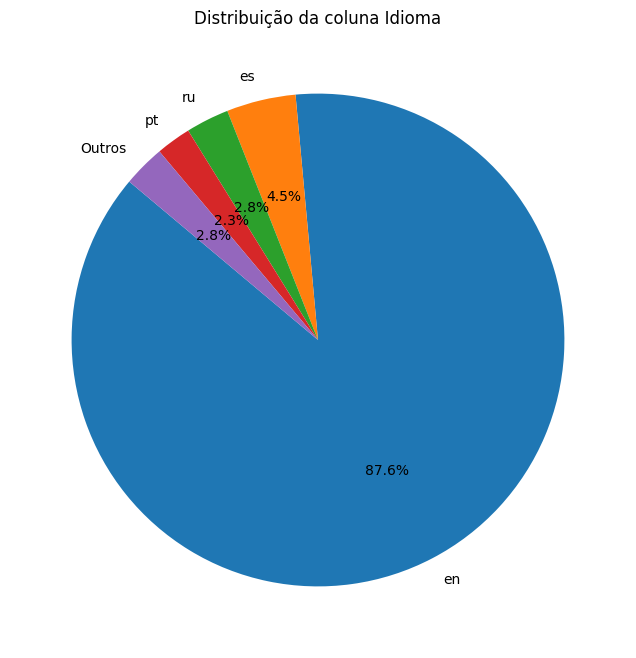

In [15]:
language_counts = df['Language'].value_counts(normalize=True) * 100

# Identificar idiomas que são menos de 1%
threshold = 1
small_languages = language_counts[language_counts < threshold]
small_languages_sum = small_languages.sum()

# Criar uma nova série com "Outros" substituindo idiomas menos de 1%
language_counts_filtered = language_counts[language_counts >= threshold]
language_counts_filtered['Outros'] = small_languages_sum

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(language_counts_filtered, labels=language_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da coluna Idioma')
plt.show()

In [16]:
dfa = df[df['title'] == 'The Last of Us Part II']
print('The Last of Us Part II', (987/len(dfa)) * 100)

dfa = df[df['title'] == 'Mortal Kombat 11']
print('Mortal Kombat 11', (200/len(dfa)) * 100)

dfa = df[df['title'] == 'Horizon Forbidden West: Burning Shores']
print('Horizon Forbidden West: Burning Shores' ,(190/len(dfa)) * 100)

dfa = df[df['title'] == 'Ghost of Tsushima']
print('Ghost of Tsushima', (188/len(dfa)) * 100)

dfa = df[df['title'] == 'Battlefield V']
print('Battlefield V ', (135/len(dfa)) * 100)

dfa = df[df['title'] == 'Horizon Forbidden West']
print('Horizon Forbidden West ', (121/len(dfa)) * 100)

dfa = df[df['title'] == 'Saints Row']
print('Saints Row', (110/len(dfa)) * 100)

dfa = df[df['title'] == 'Gone Home']
print('Gone Home', (107/len(dfa)) * 100)

The Last of Us Part II 9.880868955851437
Mortal Kombat 11 25.062656641604008
Horizon Forbidden West: Burning Shores 15.612161051766641
Ghost of Tsushima 1.9272168118913378
Battlefield V  13.339920948616601
Horizon Forbidden West  2.302130898021309
Saints Row 18.181818181818183
Gone Home 12.632821723730814


In [17]:
STOPWORDS = [
    'game', 'that', 'this', 'the', 'o', 'and', 'to', 'of', 'in', 'a', 'for', 'on', 
    'with', 'as', 'is', 'are', 'it', 'by', 'from', 'at', 'or', 'an', 'be', 'which', 
    'has', 'you', 'was', 'we', 'their', 'all', 'will', 'can', 'they', 'more', 'but', 
    'our', 'have', 'had', 'your', 'when', 'other', 'how', 'out', 'do', 'up', 'about', 
    'so', 'what', 'its', 'if', 'my', 'who', 'get', 'there', 'would', 'her', 'him', 
    'been', 'one', 'no', 'I', 'me', 'too', 'que', 'do', 'da','y', 'de', 'not', 'just', 'spoiler', 'alert', 'spoiler alert', 'Pokemon','Pokémon', 'review', 'contains', 'spoilers', 'Borderland', 'Nope', 'nope', 'like', 'even', 'Battlefield', 'Overwatch', 'Sonic', 'Frontier', 'diablo', 'game', 'SPOILER', 'ALERT', 'fun'
]
custom_stopwords = set(STOPWORDS)
#custom_stopwords = custom_stopwords.union(set(todasPalavras))

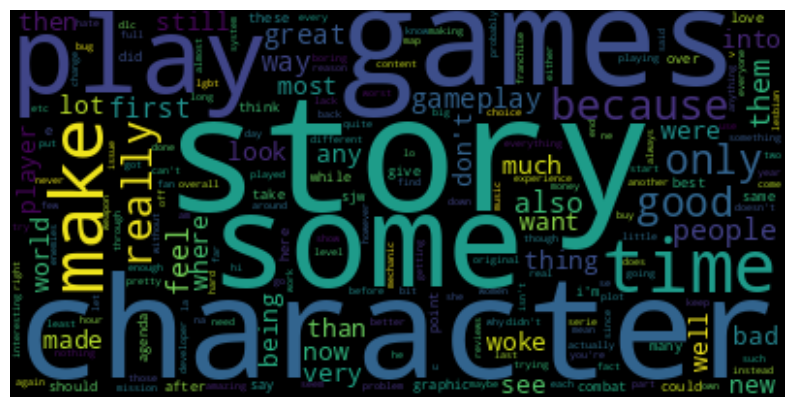

In [18]:
text = ' '.join(filtered_df['review'])

wordcloud = WordCloud(stopwords=custom_stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()